# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](../reports/figures/farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [1]:
# All required libraries are imported here for you.
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load the dataset
crops = pd.read_csv("../data/raw/soil_measures.csv")

In [2]:
print(crops.head(10))

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
5  69  37  42  7.073454  rice
6  69  55  38  5.700806  rice
7  94  53  40  5.718627  rice
8  89  54  38  6.685346  rice
9  68  58  38  6.336254  rice


In [3]:
print(crops.describe())

                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091


In [4]:
print(crops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None


In [5]:
print(crops.dtypes)

N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object


In [6]:
print(crops.crop.unique())
print(crops.crop.nunique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
22


In [7]:
crops.crop.value_counts()

crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

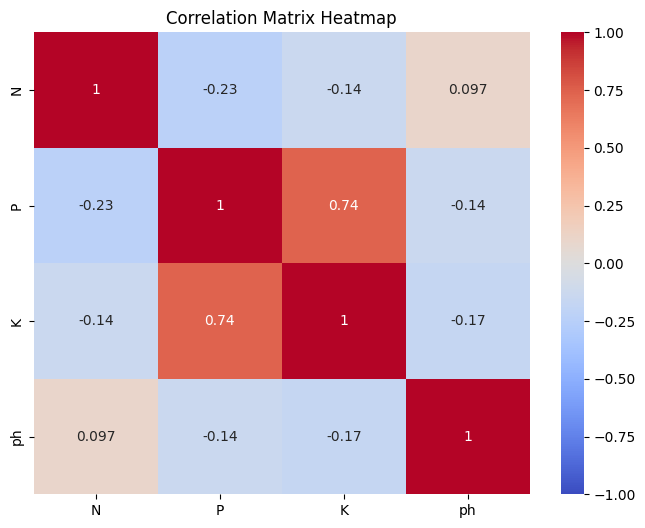

In [8]:
matrix=crops.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [9]:
X = crops.drop('crop', axis=1)
y = crops['crop']

In [10]:
best_features= SelectKBest(score_func=chi2, k=4)
fit= best_features.fit(X,y)

In [11]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [12]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
3,ph,74.886567
1,P,42500.133699
0,N,53144.698042
2,K,116710.530813


In [13]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.3)

In [14]:
column_names = X_train.columns
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X=X_train)
X_test=scaler.transform(X_test)
X_train = pd.DataFrame(X_train,columns=column_names)
X_test = pd.DataFrame(X_test,columns=column_names)

In [15]:
features_dict = {}
log_reg = LogisticRegression(multi_class='multinomial')
feature_performance = {}
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(multi_class='multinomial')
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    feature_performance[feature] = metrics.f1_score(y_test,y_pred, average='weighted')
    print(f"F1-score for {feature}: {feature_performance}")

F1-score for N: {'N': 0.06982298747878199}
F1-score for P: {'N': 0.06982298747878199, 'P': 0.10215772328902571}
F1-score for K: {'N': 0.06982298747878199, 'P': 0.10215772328902571, 'K': 0.1622538473818069}
F1-score for ph: {'N': 0.06982298747878199, 'P': 0.10215772328902571, 'K': 0.1622538473818069, 'ph': 0.05746042751296738}


In [16]:
best_predictive_feature = {}
best_predictive_feature['K'] = feature_performance['K']

In [17]:
logreg= LogisticRegression(multi_class='multinomial')
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [18]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

            N         P         K        ph
0   -1.281899  0.730889 -0.598167  0.567252
1   -1.255111 -0.323409 -0.598167  3.116497
2   -0.880082 -0.805374 -0.152245  0.943356
3   -1.147960  0.128433 -0.617554  1.087821
4   -0.478266  0.700766 -0.656330  1.761385
..        ...       ...       ...       ...
655  0.834334  0.640521  0.119185 -0.223624
656 -0.612205  2.086416  2.969204 -0.013241
657  1.530816 -0.895743 -0.346124 -0.026799
658 -0.478266 -0.202918 -0.617554  2.830529
659  0.887910 -1.076480 -0.055306  0.428824

[660 rows x 4 columns]
['lentil' 'mothbeans' 'pomegranate' 'lentil' 'blackgram' 'muskmelon'
 'pomegranate' 'cotton' 'mothbeans' 'cotton' 'mothbeans' 'cotton'
 'kidneybeans' 'jute' 'grapes' 'maize' 'coffee' 'muskmelon' 'coconut'
 'watermelon' 'papaya' 'lentil' 'papaya' 'kidneybeans' 'rice' 'muskmelon'
 'papaya' 'orange' 'banana' 'blackgram' 'apple' 'chickpea' 'papaya'
 'maize' 'banana' 'orange' 'rice' 'apple' 'chickpea' 'papaya' 'rice'
 'mungbean' 'lentil' 'kidneybean

In [19]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test, y_pred, zero_division=1, average='weighted'))
print('Precision: ',metrics.precision_score(y_test, y_pred, zero_division=1, average='weighted'))
print('CL Report: ',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy:  0.6575757575757576
Recall:  0.6575757575757576
Precision:  0.6588117396888176
CL Report:                precision    recall  f1-score   support

       apple       0.58      0.69      0.63        26
      banana       1.00      1.00      1.00        30
   blackgram       0.61      0.76      0.68        29
    chickpea       1.00      0.91      0.95        33
     coconut       0.56      0.79      0.66        24
      coffee       0.85      0.92      0.88        25
      cotton       0.89      0.96      0.93        26
      grapes       0.64      0.52      0.57        27
        jute       0.67      0.73      0.70        30
 kidneybeans       0.40      0.38      0.39        32
      lentil       0.53      0.56      0.54        34
       maize       0.97      0.91      0.94        32
       mango       0.39      0.29      0.33        24
   mothbeans       0.26      0.31      0.28        29
    mungbean       0.47      0.25      0.33        32
   muskmelon       0.46      0.55 

[Text(0, 0.5, 'rice'),
 Text(0, 1.5, 'maize'),
 Text(0, 2.5, 'chickpea'),
 Text(0, 3.5, 'kidneybeans'),
 Text(0, 4.5, 'pigeonpeas'),
 Text(0, 5.5, 'mothbeans'),
 Text(0, 6.5, 'mungbean'),
 Text(0, 7.5, 'blackgram'),
 Text(0, 8.5, 'lentil'),
 Text(0, 9.5, 'pomegranate'),
 Text(0, 10.5, 'banana'),
 Text(0, 11.5, 'mango'),
 Text(0, 12.5, 'grapes'),
 Text(0, 13.5, 'watermelon'),
 Text(0, 14.5, 'muskmelon'),
 Text(0, 15.5, 'apple'),
 Text(0, 16.5, 'orange'),
 Text(0, 17.5, 'papaya'),
 Text(0, 18.5, 'coconut'),
 Text(0, 19.5, 'cotton'),
 Text(0, 20.5, 'jute'),
 Text(0, 21.5, 'coffee')]

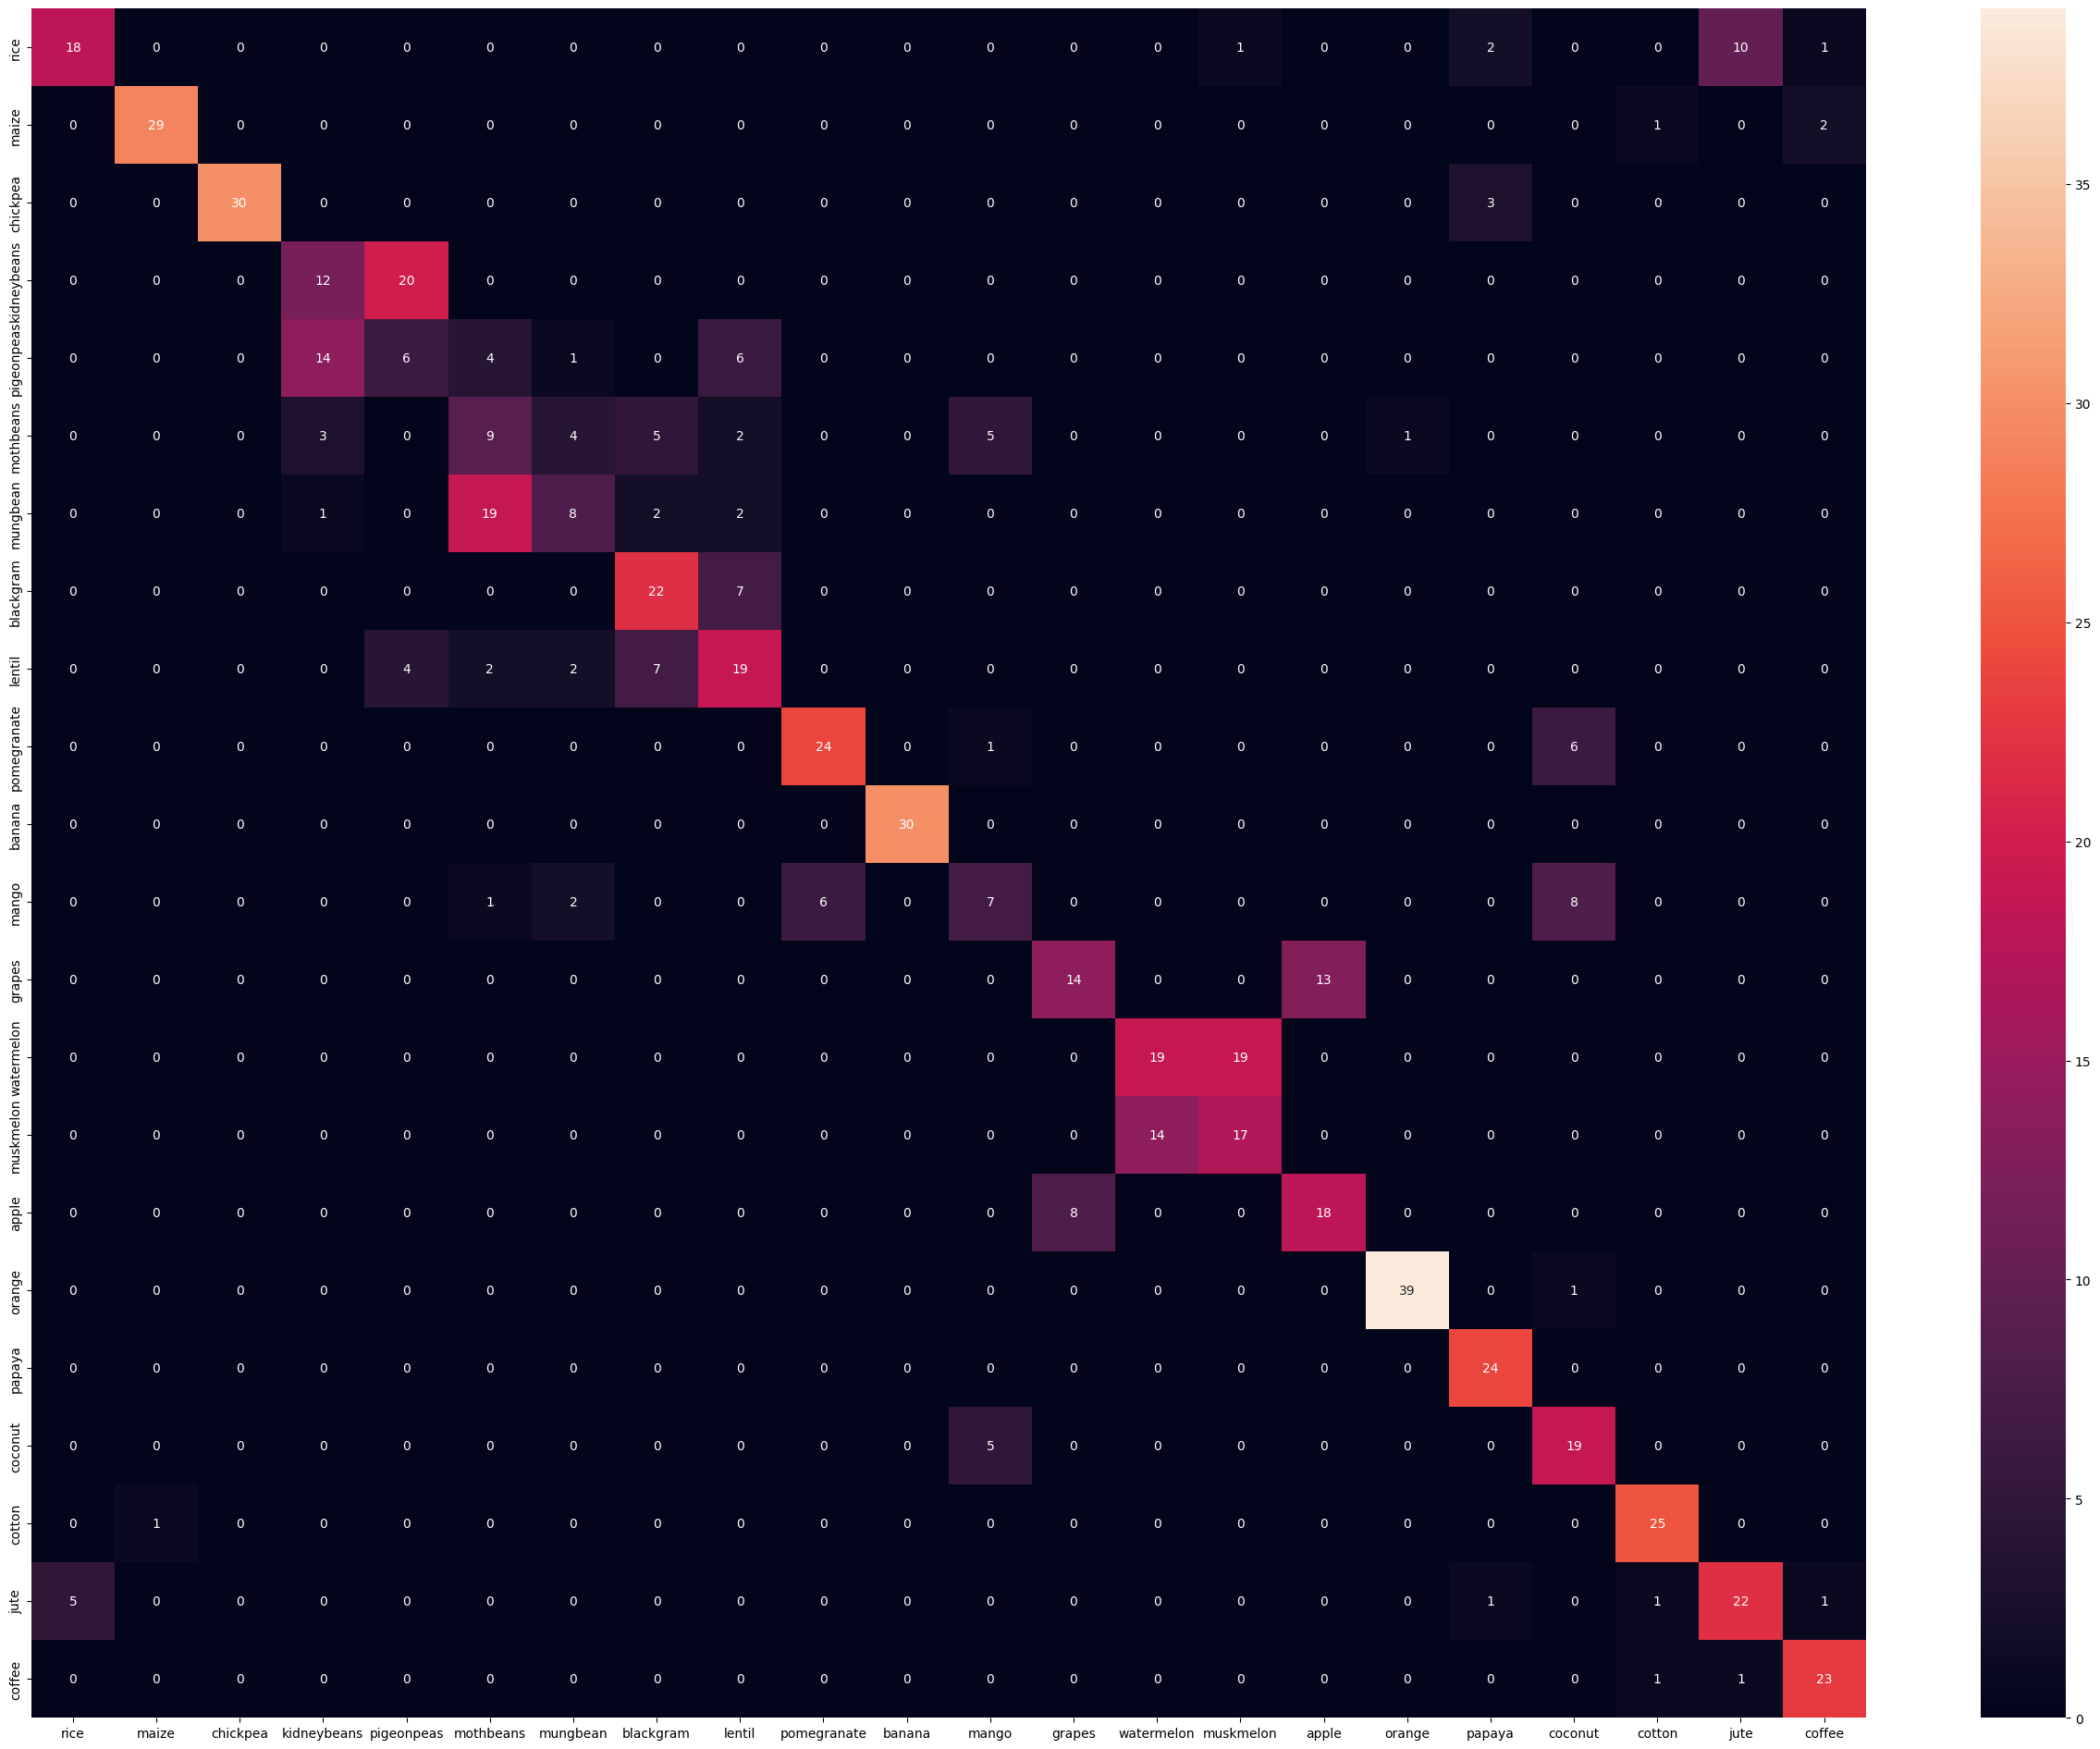

In [20]:
plt.figure(figsize=(32, 24))
confusion = confusion_matrix(y_test, y_pred,labels=crops.crop.unique())
ax = sns.heatmap(confusion,annot=True)

ax.xaxis.set_ticklabels(crops.crop.unique())
ax.yaxis.set_ticklabels(crops.crop.unique())


In [23]:
#Saving Training and Testing Sets
X_train.to_csv('../data/processed/X_train_scaled.csv',index=False)
X_test.to_csv('../data/processed/X_test_scaled.csv',index=False)
y_train.to_csv('../data/processed/y_train.csv',index=False)
y_test.to_csv('../data/processed/y_test.csv',index=False)


In [24]:
#Saving Classification Model
import pickle
filename = '../models/agriculture_multiclassification_model.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [25]:
#Saving Classification Model
filename = '../models/feature_importance_model.pkl'
pickle.dump(log_reg, open(filename, 'wb'))